<a href="https://colab.research.google.com/github/suke-bhargav/BREAST-CANCER-CBISDDSM/blob/main/kaggleanalysisdataset2modelscode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import shutil
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)


/content


In [3]:
from google.colab import files
from os import environ

In [4]:
!pip install -q kaggle

In [5]:
# upload kaggle API key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# define kaggle config folder
! mkdir "./kaggle" && mv "./kaggle.json" "./kaggle/kaggle.json"
environ['KAGGLE_CONFIG_DIR'] = './kaggle'

# hide kaggle API key for other users
! chmod 600 ./kaggle/kaggle.json


In [7]:
# fetch kaggle dataset
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset
!unzip "./*.zip" && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [8]:
csv_path = '/content/csv/meta.csv'
df_meta = pd.read_csv(csv_path)
dicom_data = pd.read_csv('/content/csv/dicom_info.csv')

In [9]:
image_dir = '/content/jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]
cropped_images.iloc[0]

'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [ ]:
full_mammogram_images.shape

(2857,)

In [ ]:
roi_mask_images.shape

(3247,)

In [ ]:
cropped_images.shape

(3567,)

In [10]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    # print(dicom)
    key = dicom.split("/")[3]
    # print(key)
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[3]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[3]
    roi_mask_dict[key] = dicom

In [11]:
sys.getsizeof(full_mammogram_dict)

147552

In [11]:
mass_train_data = pd.read_csv('/content/csv/mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('/content/csv/mass_case_description_test_set.csv')
calc_train_data = pd.read_csv('/content/csv/calc_case_description_train_set.csv')
calc_test_data = pd.read_csv('/content/csv/calc_case_description_test_set.csv')

In [12]:
def filter_dataframe_by_base_directory(df):
    base_directory = '/content/jpeg'

    # Check if all three columns start with the base directory
    mask = (
        df['image file path'].str.startswith(base_directory) &
        df['cropped image file path'].str.startswith(base_directory) &
        df['ROI mask file path'].str.startswith(base_directory)
    )

    # Keep only the rows where all three columns start with the base directory
    filtered_df = df[mask]

    return filtered_df

MASS

In [13]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [14]:
fix_image_path_mass(mass_train_data)

In [15]:
fix_image_path_mass(mass_test_data)

CALC

In [16]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [17]:
fix_image_path_calc(calc_train_data)

In [18]:
fix_image_path_mass(calc_test_data)

In [19]:
mass_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

MASS

In [16]:
mass_train = mass_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})
mass_test = mass_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})


CALC

In [21]:
calc_train = calc_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})
calc_test = calc_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [17]:
def count_jpg_files_in_directory(directory):
    total_jpg_files = 0

    # Walk through the directory and count .jpg files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):
                total_jpg_files += 1

    return total_jpg_files

# Example usage:
base_directory = '/content/jpeg'
total_jpg_files = count_jpg_files_in_directory(base_directory)

print(f'Total number of .jpg files in {base_directory}: {total_jpg_files}')

Total number of .jpg files in /content/jpeg: 10237


In [ ]:
mass_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3423861...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2967364...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3593083...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2279552...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.8918004...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4291204...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2953609...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1151342...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4105247...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1285736...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3997425...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.9466221...
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1740870...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3035467...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4125580...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3873256...
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1503114...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2374051...


In [19]:
mass_train.image_file_path[0]

'/content/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg'

In [20]:
mass_train.ROI_mask_file_path[0]

'/content/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg'

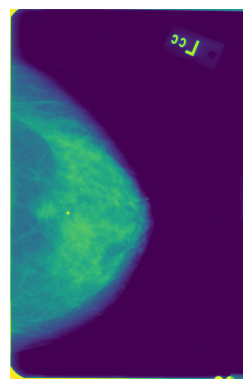

In [ ]:
img1 = mpimg.imread(mass_train.image_file_path[0])
plt.imshow(img1)
plt.axis('off')
plt.show()

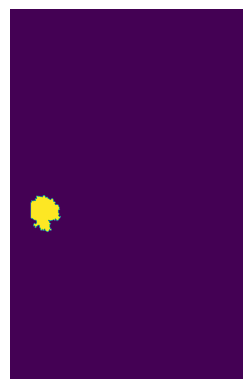

In [ ]:
img2= mpimg.imread(mass_train.ROI_mask_file_path[0])
plt.imshow(img2)
plt.axis('off')
plt.show()

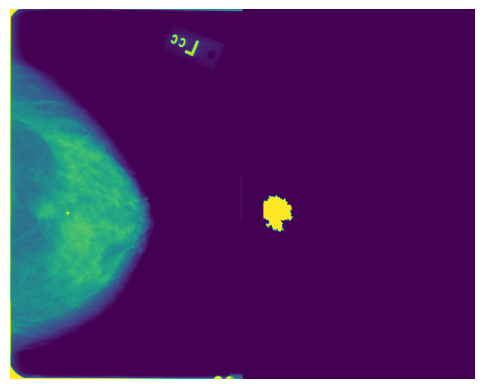

In [ ]:
hshow= cv2.hconcat([img1,img2]);
plt.imshow(hshow)
plt.axis('off')
plt.show()

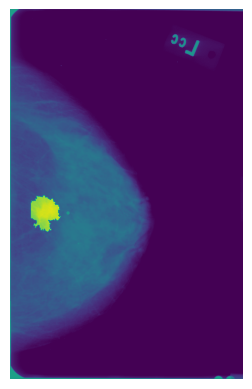

In [ ]:
out1=cv2.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(out1)
plt.axis('off')
plt.show()

In [ ]:
calc_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4741431...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3933440...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2505966...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2962812...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2286996...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3141358...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1047434...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.9145827...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4067256...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2813974...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2151649...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1264661...
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3982279...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1443954...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.8321407...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1778337...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1140307...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4206976...


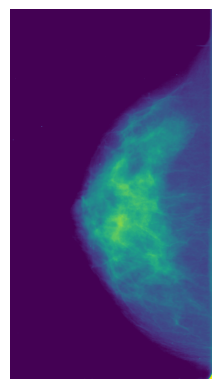

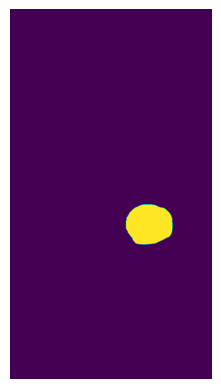

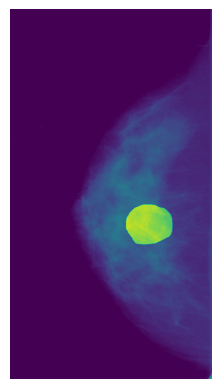

In [ ]:
img3 = mpimg.imread(calc_train.image_file_path[0])
plt.imshow(img3)
plt.axis('off')
plt.show()

img4= mpimg.imread(calc_train.ROI_mask_file_path[0])
plt.imshow(img4)
plt.axis('off')
plt.show()

out2=cv2.addWeighted(img3,0.5,img4,0.5,0)
plt.imshow(out2)
plt.axis('off')
plt.show()

In [21]:
!mkdir fmammograms
!mkdir maskmimg

WHAT CLASSIFICATIONS TO BE MADE

MASS

In [ ]:
mass_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3423861...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2967364...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3593083...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2279552...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.8918004...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4291204...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2953609...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1151342...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4105247...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1285736...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3997425...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.9466221...
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1740870...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3035467...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4125580...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3873256...
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1503114...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2374051...


In [ ]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [ ]:
mass_train.mass_margins.unique()

array(['SPICULATED', 'ILL_DEFINED', 'CIRCUMSCRIBED',
       'ILL_DEFINED-SPICULATED', 'OBSCURED', 'OBSCURED-ILL_DEFINED', nan,
       'MICROLOBULATED', 'MICROLOBULATED-ILL_DEFINED-SPICULATED',
       'MICROLOBULATED-SPICULATED', 'CIRCUMSCRIBED-ILL_DEFINED',
       'MICROLOBULATED-ILL_DEFINED', 'CIRCUMSCRIBED-OBSCURED',
       'OBSCURED-SPICULATED', 'OBSCURED-ILL_DEFINED-SPICULATED',
       'CIRCUMSCRIBED-MICROLOBULATED'], dtype=object)

In [ ]:
pd.value_counts(mass_train.mass_margins)

CIRCUMSCRIBED                            305
SPICULATED                               281
ILL_DEFINED                              278
OBSCURED                                 197
MICROLOBULATED                           108
CIRCUMSCRIBED-ILL_DEFINED                 27
ILL_DEFINED-SPICULATED                    25
OBSCURED-ILL_DEFINED                      19
CIRCUMSCRIBED-OBSCURED                    19
OBSCURED-SPICULATED                        4
OBSCURED-ILL_DEFINED-SPICULATED            4
MICROLOBULATED-ILL_DEFINED                 3
MICROLOBULATED-ILL_DEFINED-SPICULATED      2
MICROLOBULATED-SPICULATED                  2
CIRCUMSCRIBED-MICROLOBULATED               1
Name: mass_margins, dtype: int64

In [ ]:
mass_train.mass_shape.unique()

array(['IRREGULAR-ARCHITECTURAL_DISTORTION', 'ARCHITECTURAL_DISTORTION',
       'OVAL', 'IRREGULAR', 'LYMPH_NODE', 'LOBULATED-LYMPH_NODE',
       'LOBULATED', 'FOCAL_ASYMMETRIC_DENSITY', 'ROUND',
       'LOBULATED-ARCHITECTURAL_DISTORTION', 'ASYMMETRIC_BREAST_TISSUE',
       'LOBULATED-IRREGULAR', nan, 'OVAL-LYMPH_NODE', 'LOBULATED-OVAL',
       'ROUND-OVAL', 'IRREGULAR-FOCAL_ASYMMETRIC_DENSITY',
       'ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION', 'ROUND-LOBULATED'],
      dtype=object)

In [ ]:
pd.value_counts(mass_train.mass_shape.unique())

IRREGULAR-ARCHITECTURAL_DISTORTION          1
ARCHITECTURAL_DISTORTION                    1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION    1
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY          1
ROUND-OVAL                                  1
LOBULATED-OVAL                              1
OVAL-LYMPH_NODE                             1
LOBULATED-IRREGULAR                         1
ASYMMETRIC_BREAST_TISSUE                    1
LOBULATED-ARCHITECTURAL_DISTORTION          1
ROUND                                       1
FOCAL_ASYMMETRIC_DENSITY                    1
LOBULATED                                   1
LOBULATED-LYMPH_NODE                        1
LYMPH_NODE                                  1
IRREGULAR                                   1
OVAL                                        1
ROUND-LOBULATED                             1
dtype: int64

In [ ]:
mass_train.abnormality_id.unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
mass_train.breast_density.unique()

array([3, 2, 1, 4])

CALC


In [ ]:
calc_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4741431...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3933440...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2505966...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2962812...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2286996...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3141358...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1047434...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.9145827...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4067256...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2813974...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2151649...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1264661...
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3982279...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1443954...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.8321407...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1778337...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1140307...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4206976...


In [ ]:
pd.value_counts(calc_train.calc_type)

PLEOMORPHIC                                                 664
AMORPHOUS                                                   138
PUNCTATE                                                    106
LUCENT_CENTER                                                93
VASCULAR                                                     82
FINE_LINEAR_BRANCHING                                        77
COARSE                                                       35
ROUND_AND_REGULAR-LUCENT_CENTER                              31
PLEOMORPHIC-FINE_LINEAR_BRANCHING                            28
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                     24
ROUND_AND_REGULAR-EGGSHELL                                   23
PUNCTATE-PLEOMORPHIC                                         21
DYSTROPHIC                                                   20
LUCENT_CENTERED                                              18
ROUND_AND_REGULAR                                            17
ROUND_AND_REGULAR-LUCENT_CENTERED       

In [ ]:
calc_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [ ]:
calc_train.calc_distribution.unique()

array(['CLUSTERED', 'LINEAR', 'REGIONAL', 'DIFFUSELY_SCATTERED',
       'SEGMENTAL', nan, 'CLUSTERED-LINEAR', 'CLUSTERED-SEGMENTAL',
       'LINEAR-SEGMENTAL', 'REGIONAL-REGIONAL'], dtype=object)

BEFORE TRAINING

In [18]:
mimgfilepath=mass_train.image_file_path

In [19]:
mroifilepath=mass_train.ROI_mask_file_path


SPLITTING THE MASK AND ORIGINAL FOR TRAINING

In [20]:
fmammo='/content/hi/fmammograms'
roiimg='/content/hi/maskmimg'

In [21]:
os.makedirs(fmammo,exist_ok=True)
os.makedirs(roiimg,exist_ok=True)

In [22]:
for img_path in mimgfilepath:
  img_filename=os.path.basename(img_path)
  destination_path=os.path.join(fmammo,img_filename)
  shutil.copy(img_path,destination_path)

In [23]:
for roi_path in mroifilepath:
  img_filename1=os.path.basename(roi_path)
  destination_path1=os.path.join(roiimg,img_filename1)
  shutil.copy(roi_path,destination_path1)

In [24]:
benign=mass_train[mass_train.pathology=="BENIGN"]

In [25]:
benignwoclbk=mass_train[mass_train.pathology=="BENIGN_WITHOUT_CALLBACK"]
malignant=mass_train[mass_train.pathology=="MALIGNANT"]

In [26]:
benignimgs=benign.image_file_path
malignantimgs=malignant.image_file_path
benignwoclbkimgs=benignwoclbk.image_file_path
ben='/content/class/benign'
benwcb='/content/class/benignwithoutcallback'
mal='/content/class/malignant'
os.makedirs(ben,exist_ok=True)
os.makedirs(mal,exist_ok=True)

In [27]:
for ben_path in benignimgs:
  img_filename1=os.path.basename(ben_path)
  destination_path1=os.path.join(ben,img_filename1)
  shutil.copy(ben_path,destination_path1)

for mal_path in malignantimgs:
  img_filename1=os.path.basename(mal_path)
  destination_path1=os.path.join(mal,img_filename1)
  shutil.copy(mal_path,destination_path1)


In [39]:
!zip -r /content/class.zip //content/class


  adding: malignant/ (stored 0%)
  adding: malignant/1-204.jpg (deflated 10%)
  adding: malignant/1-117.jpg (deflated 5%)
  adding: malignant/1-254.jpg (deflated 5%)
  adding: malignant/1-015.jpg (deflated 2%)
  adding: malignant/1-257.jpg (deflated 4%)
  adding: malignant/1-085.jpg (deflated 4%)
  adding: malignant/1-277.jpg (deflated 7%)
  adding: malignant/1-051.jpg (deflated 3%)
  adding: malignant/1-119.jpg (deflated 5%)
  adding: malignant/1-115.jpg (deflated 10%)
  adding: malignant/1-028.jpg (deflated 4%)
  adding: malignant/1-114.jpg (deflated 4%)
  adding: malignant/1-163.jpg (deflated 5%)
  adding: malignant/1-123.jpg (deflated 7%)
  adding: malignant/1-149.jpg (deflated 10%)
  adding: malignant/1-282.jpg (deflated 3%)
  adding: malignant/1-077.jpg (deflated 5%)
  adding: malignant/1-058.jpg (deflated 4%)
  adding: malignant/1-130.jpg (deflated 14%)
  adding: malignant/1-195.jpg (deflated 8%)
  adding: malignant/1-293.jpg (deflated 8%)
  adding: malignant/1-095.jpg (deflated

In [ ]:
from google.colab import files
files.download("/content/class.zip")

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [20]:
images=list()
masks=list()

In [21]:
batch = 200
def get_train_set(batch):
    images1 = list()
    masks1 = list()
    temp = mass_train["image_file_path"][batch-200:batch]
    for i in temp:
        im = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im,(1024,1024))/255.0
        images1.append(im)
    for i in mass_train["ROI_mask_file_path"][batch-200:batch]:
        im = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im,(1024,1024))/255.0
        masks1.append(im)
    batch+=200
    return images1,masks1

In [22]:
images, masks = get_train_set(batch)

In [23]:
len(images)

200

In [24]:
images=np.array(images)

In [25]:
len(masks)
masks=np.array(masks)

In [ ]:
!pip install keras-segmentation

In [27]:
from keras_segmentation.models.unet import vgg_unet

In [60]:
model=vgg_unet(n_classes=2,input_height=1024,input_width=1024)

In [61]:
model

In [62]:
from keras_segmentation.train import train

In [63]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [64]:
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.train import train

# Define parameters
input_height = 1024
input_width = 1024
n_classes = 2  # Number of classes in your segmentation task
epochs = 10  # Number of epochs for training

# Instantiate the VGGU-Net model
model = vgg_unet(n_classes=n_classes, input_height=input_height, input_width=input_width)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define paths to training and validation data
train_images_path = '/content/hi/fmammograms'
train_masks_path = '/content/hi/maskmimg'


In [67]:
len(images)

200

MODEL TRAIN PART

In [69]:
# Import necessary libraries
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.train import train


In [70]:
# Define parameters
input_height = 1024
input_width = 1024
n_classes = 2  # Assuming binary segmentation (background vs. object)


In [72]:
type(images)

numpy.ndarray

In [ ]:

# Define paths to training data
train_images_array = images  # Replace with your train images array
train_masks_array = masks  # Replace with your train masks array

# Instantiate the VGGU-Net model
model = vgg_unet(n_classes=n_classes, input_height=input_height, input_width=input_width)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train(model,
      train_images=train_images_array,
      train_annotations=train_masks_array,
      epochs=10,  # Adjust as needed
      steps_per_epoch=100)  # Adjust as needed


In [86]:
import os
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout
from keras import Input, Model


In [83]:
def create_upsample_layer(filters, kernel_size, padding='same', kernel_initializer='he_normal'):

    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = UpSampling2D(size=(2, 2))(x)
        return x
    return layer

def create_downsample_layer(filters, kernel_size, padding='same', kernel_initializer='he_normal'):
    """ This function creates a layer that downsamples an input tensor using a convolutional, batch
    normalization, and ReLU activation, followed by a max pooling operation. """
    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPool2D(pool_size=(2, 2))(x)
        return x
    return layer

dropout_rate = 0.15

# Example usage
inputs = Input(shape=(1024, 1024, 1))
# Encoder part of the DeepUNet
x = create_downsample_layer(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
x = create_downsample_layer(128, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(256, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(512, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(1024, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(2048, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)

# Decoder part of the DeepUNet
x = create_upsample_layer(1024, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(512, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(256, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(128, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(32, 3, padding='same', kernel_initializer='he_normal')(x)
outputs = Conv2D(1, 1, padding = 'same', activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1024, 1024, 1)]   0         
                                                                 
 conv2d_89 (Conv2D)          (None, 1024, 1024, 64)    640       
                                                                 
 batch_normalization_76 (Ba  (None, 1024, 1024, 64)    256       
 tchNormalization)                                               
                                                                 
 re_lu_36 (ReLU)             (None, 1024, 1024, 64)    0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 512, 512, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_90 (Conv2D)          (None, 512, 512, 128)     738

In [87]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 50
batch_size = 16

# Set seed
# tf.random.set_seed(42)
tf.random.set_seed(1)

# Train the UNet model on the training data
history = model.fit(#dataset,
                    images,
                    masks,
                    batch_size=batch_size, epochs=num_epochs,
                    )

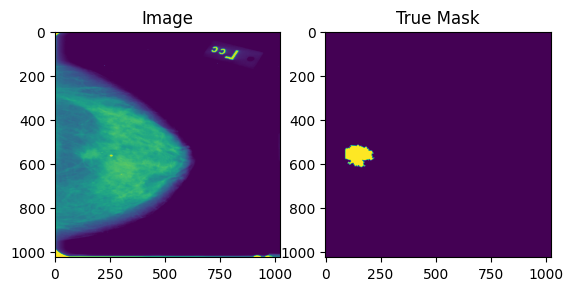

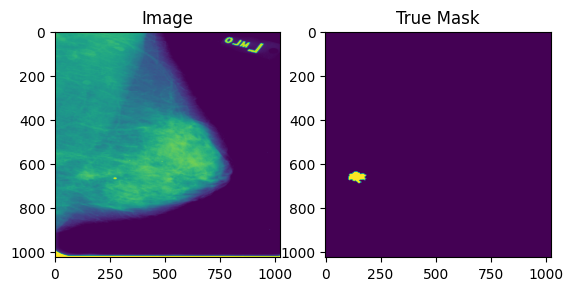

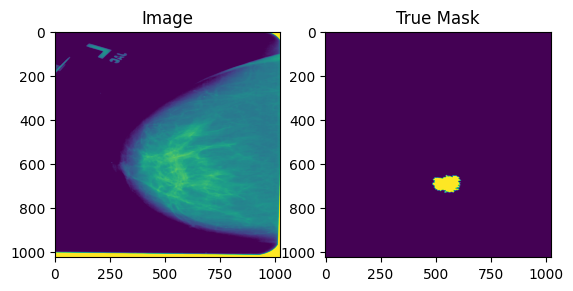

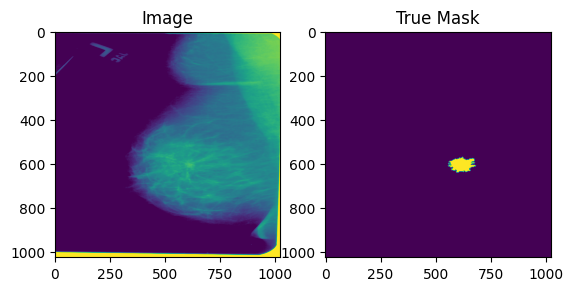

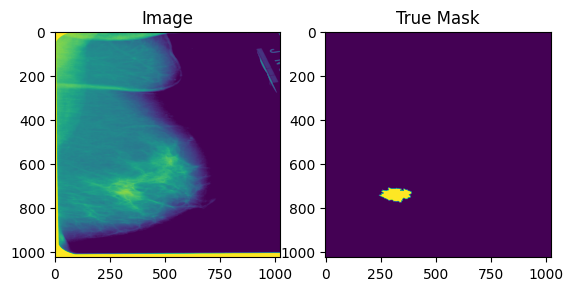

In [90]:
for i in range(5):
    image = images[i]
    mask = masks[i]

    # Display the image and the true mask
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax1.set_title("Image")
    ax2.imshow(mask)
    ax2.set_title("True Mask")

    plt.show()

In [ ]:
import os
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout
from keras import Input, Model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [41]:
!zip -r /content/data.zip /content/hi

  adding: content/hi/ (stored 0%)
  adding: content/hi/fmammograms/ (stored 0%)
  adding: content/hi/fmammograms/1-204.jpg (deflated 8%)
  adding: content/hi/fmammograms/1-117.jpg (deflated 5%)
  adding: content/hi/fmammograms/1-063.jpg (deflated 6%)
  adding: content/hi/fmammograms/1-254.jpg (deflated 5%)
  adding: content/hi/fmammograms/1-015.jpg (deflated 6%)
  adding: content/hi/fmammograms/1-257.jpg (deflated 12%)
  adding: content/hi/fmammograms/1-085.jpg (deflated 4%)
  adding: content/hi/fmammograms/1-277.jpg (deflated 7%)
  adding: content/hi/fmammograms/1-076.jpg (deflated 2%)
  adding: content/hi/fmammograms/1-051.jpg (deflated 3%)
  adding: content/hi/fmammograms/1-119.jpg (deflated 5%)
  adding: content/hi/fmammograms/1-115.jpg (deflated 10%)
  adding: content/hi/fmammograms/1-028.jpg (deflated 5%)
  adding: content/hi/fmammograms/1-114.jpg (deflated 4%)
  adding: content/hi/fmammograms/1-163.jpg (deflated 4%)
  adding: content/hi/fmammograms/1-123.jpg (deflated 7%)
  addi

In [42]:
from google.colab import files
files.download("/content/data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODELLLL

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:

# Define paths to the main folder containing subfolders for images and masks
main_folder = '/content/hi'

# Define data generators for images and masks
datagen_args = dict(
    rescale=1./255,
    validation_split=0.2  # Split the data into 80% training and 20% validation
)


In [37]:

# Define image data generator
image_datagen = ImageDataGenerator(**datagen_args)

# Define mask data generator
mask_datagen = ImageDataGenerator(**datagen_args)

# Define batch size
batch_size = 32

# Define target size for images and masks
target_size = (1024, 1024)

# Define class mode as 'input' for masks
class_mode = 'input'


In [38]:

# Create image generator for mammograms (training)
train_image_generator = image_datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=None,  # Do not specify class mode to keep original mammogram images
    shuffle=True,
    seed=42,
    subset='training'  # Specify the training subset
)


Found 691 images belonging to 2 classes.


In [39]:

# Create image generator for mammograms (validation)
val_image_generator = image_datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=None,  # Do not specify class mode to keep original mammogram images
    shuffle=True,
    seed=42,
    subset='validation'  # Specify the validation subset
)


Found 171 images belonging to 2 classes.


In [40]:

# Create mask generator for masks (training)
train_mask_generator = mask_datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='grayscale',  # Load masks as grayscale images
    shuffle=True,
    seed=42,
    subset='training'  # Specify the training subset
)


Found 691 images belonging to 2 classes.


In [41]:

# Create mask generator for masks (validation)
val_mask_generator = mask_datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='grayscale',  # Load masks as grayscale images
    shuffle=True,
    seed=42,
    subset='validation'  # Specify the validation subset
)

# Now you can use train_image_generator and train_mask_generator for training,
# and val_image_generator and val_mask_generator for validation


Found 171 images belonging to 2 classes.


In [43]:
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29057 sha256=780e9876e9a1fd6620280ada10aca87186b75359427980731d1cdfd20d21b46e
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [44]:
from keras_segmentation.models.unet import vgg_unet

In [45]:
# Load the vgg_unet model
model = vgg_unet(n_classes=2, input_height=1024, input_width=1024)

58889256/58889256 [==============================] - 0s 0us/step


In [46]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
train_generator=zip(train_image_generator,train_mask_generator)

In [49]:
val_generator=zip(val_image_generator,val_mask_generator)

In [50]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_image_generator),
    validation_data=val_generator,
    validation_steps=len(val_image_generator)
)

Epoch 1/10


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1055, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1149, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 652, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(
    x=val_image_generator,
    y=val_mask_generator,
    steps=len(val_image_generator)
)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


MODEL CLASSIFICATION

In [51]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
# Define paths to the main folder containing subfolders for benign and malignant images
main_folder = '/content/class'

# Define batch size
batch_size = 12

# Define target size for images
target_size = (1024, 1024)

# Define number of classes
num_classes = 2

In [53]:
# Create image data generator with rescaling and grayscale conversion
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=tf.image.rgb_to_grayscale  # Convert images to grayscale
)

In [ ]:
# Generate training dataset
train_generator = datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Specify training subset
    shuffle=True,
    seed=42
)

In [ ]:
# Generate validation dataset
val_generator = datagen.flow_from_directory(
    main_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Specify validation subset
    shuffle=False,  # No need to shuffle validation data
    seed=42
)


In [ ]:
# Load a pretrained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=target_size + (1,))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [ ]:

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator, steps=len(val_generator))
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')
